In [32]:
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import urllib
import time

%matplotlib inline

import altair as alt

# using xml tool to scrape
import xml.etree.ElementTree as ET

import matplotlib
import matplotlib.pyplot as plt
from cycler import cycler
matplotlib.rc("font", family="serif", size=14)
matplotlib.rc("figure", figsize="10, 5")

# Galaxy NN in Arxiv

In [4]:
from arxiv_harvest import harvest

In [ ]:
# fetch all arxiv astro-ph metadata
df = harvest(
    arxiv="physics:astro-ph", 
    start_date="2010-01-01", 
    end_date="2018-11-15",
    output_filename="df_astro_10-18.csv"
)

In [5]:
df = pd.read_csv("df_astro_10-18.csv")

## Read data 

Skip this part if you don't have my original data, just use the `df_astro_00-18.csv`.

In [ ]:
# concat different phases of 
df = pd.concat(
    [
        pd.read_csv("df_astro_00-10.csv"), 
        pd.read_csv("df_astro_10-18.csv"),
        pd.read_csv("df_astro_18-18.csv"),
        pd.read_csv("df_astro_16-18.csv"),
        pd.read_csv("df_astro_16-18m.csv"),
        pd.read_csv("df_astro_17-18.csv"),
    ], 
    axis=0
)

# drop duplicate papers
df = df.drop_duplicates(subset=['title'], keep="first")

In [51]:
df.to_csv("df_astro_00-18.csv")

## Everything about NN

In [62]:
df = pd.read_csv(
    "df_astro_00-18.csv", parse_dates=True, index_col="created"
)

In [63]:
df_nn = df[
    df.abstract.str.contains("neural network") | 
    df.abstract.str.contains("machine learning") |
    df.abstract.str.contains("deep learning")
]
df_nn.tail()

,Unnamed: 0,Unnamed: 0.1,title,abstract,categories,id,doi
created,,,,,,,
2018-11-08,34881,34881,Bayesian Deep Learning for Exoplanet Atmospher...,"Over the past decade, the study of exoplanets ...","['astro-ph.EP', 'cs.LG']",1811.0339,NaN
2018-11-08,34912,34912,Deep Learning Applied to the Asteroseismic Mod...,We develop a novel method based on machine lea...,['astro-ph.SR'],1811.0363899999998,NaN
2018-11-08,34930,34930,Machine learning Applied to Star-Galaxy-QSO Cl...,"In modern astrophysics, the machine learning h...","['astro-ph.GA', 'astro-ph.IM', 'astro-ph.SR']",1811.0374,NaN
2018-11-09,34933,34933,Finding high-redshift strong lenses in DES usi...,We search Dark Energy Survey (DES) Year 3 imag...,"['astro-ph.GA', 'astro-ph.IM']",1811.0378600000001,NaN
2018-11-09,34940,34940,Classification of gravitational-wave glitches ...,We present a new method for the classification...,"['astro-ph.IM', 'gr-qc']",1811.03867,NaN


In [64]:
# ratio of neural network in the astro-ph
print("Number of total astro-ph papers from arxiv API 2010 - 2018:", len(df))
print("The ratio of neural net or machine learning papers in astro-ph: {:.3g}".format(len(df_nn) / len(df)))

Number of total astro-ph papers from arxiv API 2010 - 2018: 184382
The ratio of neural net or machine learning papers in astro-ph: 0.00139


In [65]:
# How many of them are about galaxy
print("How many of them are about galaxy: {:.3g}".format(
    len(df_nn[df_nn.abstract.str.contains("galaxy")]) / len(df_nn)
))
df_nn[df_nn.abstract.str.contains("galaxy")].tail()

How many of them are about galaxy: 0.273


,Unnamed: 0,Unnamed: 0.1,title,abstract,categories,id,doi
created,,,,,,,
1996-09-10,49421,49421,Quantitative Morphology of Moderate Redshift G...,The advent of the Hubble Space Telescope (HST)...,['astro-ph'],astro-ph/9609075,10.1086/303661
2018-10-30,34432,34432,Towards a radially-resolved semi-analytic mode...,"We present a flexible, detailed model for the ...",['astro-ph.GA'],1810.1291899999999,NaN
2018-11-07,34838,34838,Forging new worlds: high-resolution synthetic ...,Astronomy of the 21st century finds itself wit...,"['astro-ph.IM', 'astro-ph.GA', 'cs.LG', 'stat....",1811.0308100000002,NaN
2018-11-08,34930,34930,Machine learning Applied to Star-Galaxy-QSO Cl...,"In modern astrophysics, the machine learning h...","['astro-ph.GA', 'astro-ph.IM', 'astro-ph.SR']",1811.0374,NaN
2018-11-09,34933,34933,Finding high-redshift strong lenses in DES usi...,We search Dark Energy Survey (DES) Year 3 imag...,"['astro-ph.GA', 'astro-ph.IM']",1811.0378600000001,NaN


## Paper number through time

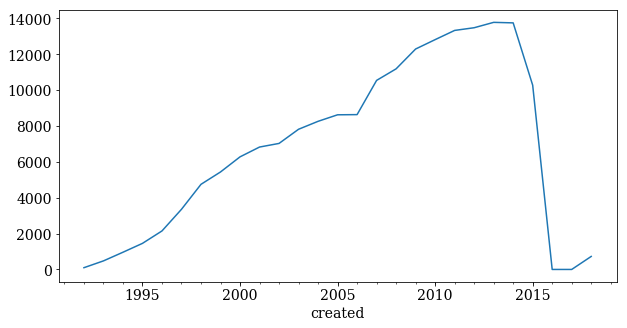

In [66]:
df.resample("Y").title.count().plot(label="nn+ml+dl")

Text(0.5,1,'Neural Net and Machine Learning Related Papers in Astro-ph')

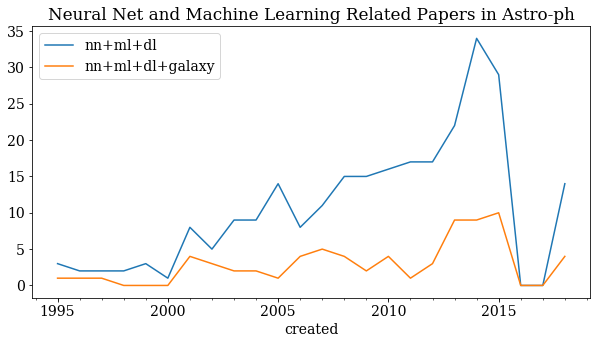

In [60]:
# Paper about neural net, ml, dl in astro-ph
df_nn.resample("Y").title.count().plot(label="nn+ml+dl")
df_nn[df_nn.abstract.str.contains("galaxy")].resample("Y").title.count().plot(label="nn+ml+dl+galaxy")
plt.legend()
plt.title("Neural Net and Machine Learning Related Papers in Astro-ph")

## Category

In [24]:
import itertools
from collections import Counter
import re

all_category = list(itertools.chain.from_iterable(
    df_nn.categories.apply(
        lambda x: re.sub(r"[\[\]' ]", "", x).split(",") 
    ).values
))

In [25]:
one_gram_category = Counter(all_category).most_common(15)
one_gram_category

[('astro-ph.IM', 208),
 ('astro-ph.CO', 112),
 ('astro-ph', 88),
 ('astro-ph.GA', 79),
 ('astro-ph.SR', 63),
 ('astro-ph.HE', 32),
 ('cs.LG', 30),
 ('astro-ph.EP', 21),
 ('stat.ML', 19),
 ('physics.data-an', 16),
 ('cs.CV', 15),
 ('gr-qc', 11),
 ('cs.NE', 8),
 ('hep-ph', 7),
 ('cs.AI', 6)]

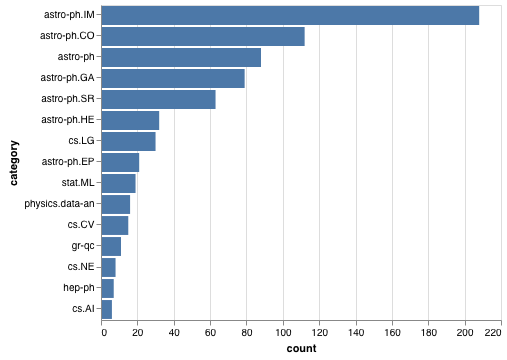

In [26]:
data = pd.DataFrame(one_gram_category, columns=["category", "count"])

alt.Chart(data).mark_bar().encode(
    x='count',
    y=alt.Y('category', sort=alt.SortField(field="freq", op="sum", order="ascending")), 
)

## N-Grams on Abstract

In [27]:
# concat all string into one big string
all_abstract = "".join(df_nn.abstract)
all_abstract = all_abstract.lower()
all_abstract = re.sub(
    r"(at |using| with |which |have |of |the |and |in |from |to |for |by |such |on |as |a |has |been |We |present |find |In |this |Sky |Survey |is |used |an |not |only |are |also |that |The |or |will |be |we )", 
    "", 
    all_abstract, 
)
all_abstract = re.sub(r"  ", " ", all_abstract, )
all_abstract = all_abstract.split(" ")

# ngrams
one_gram_abstract    = Counter(all_abstract)
two_grams_abstract   = Counter(zip(all_abstract, all_abstract[1:]))
three_grams_abstract = Counter(zip(all_abstract, all_abstract[1:], all_abstract[2:]))

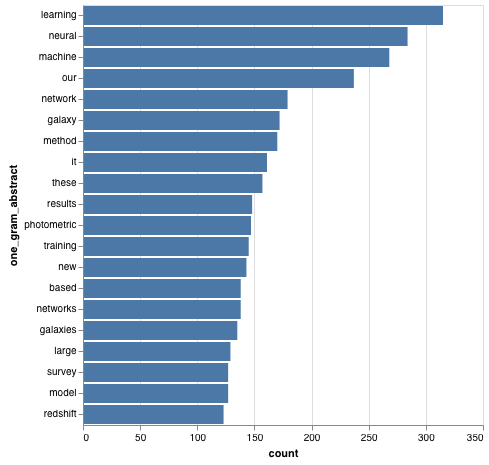

In [28]:
# 1-gram
one_gram_abstract.most_common(20)

data = pd.DataFrame(one_gram_abstract.most_common(20), columns=["one_gram_abstract", "count"])

alt.Chart(data).mark_bar().encode(
    x='count',
    y=alt.Y('one_gram_abstract', sort=alt.SortField(field="freq", op="sum", order="ascending")), 
)

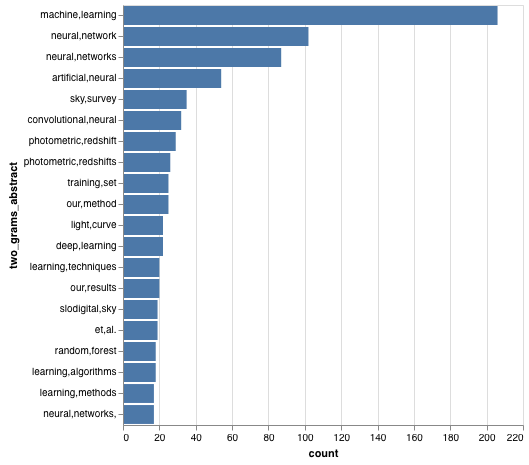

In [29]:
# 2-grams
two_grams_abstract.most_common(20)

data = pd.DataFrame(two_grams_abstract.most_common(20), columns=["two_grams_abstract", "count"])

alt.Chart(data).mark_bar().encode(
    x='count',
    y=alt.Y('two_grams_abstract', sort=alt.SortField(field="freq", op="sum", order="ascending")), 
)

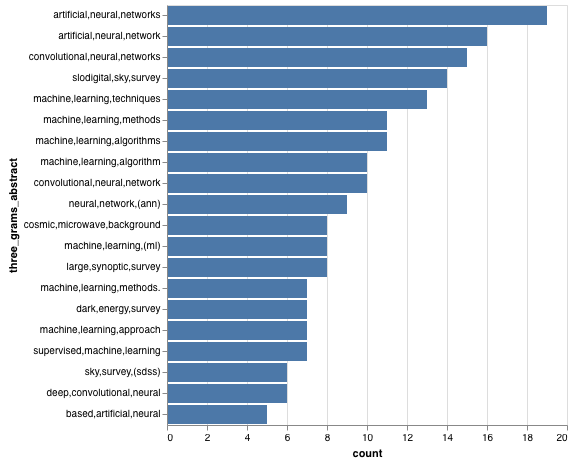

In [42]:
# 3-grams
three_grams_abstract.most_common(20)

data = pd.DataFrame(three_grams_abstract.most_common(20), columns=["three_grams_abstract", "count"])

alt.Chart(data).mark_bar().encode(
    x='count',
    y=alt.Y('three_grams_abstract', sort=alt.SortField(field="freq", op="sum", order="ascending")), 
)

## Neural Network Type

It is interesting to see what type of the NN has been used most often.

In [60]:
df_nn[df_nn.abstract.apply(lambda x : "recurrent" in x)]

,Unnamed: 0,title,abstract,categories,created,id,doi
19251,19251,Increasing Lifetime of Recurrent Sunspot Group...,Long-lived (>20 days) sunspot groups extracted...,['astro-ph.SR'],2009-07-24,0907.4274,10.1007/s11207-009-9419-5
29501,29501,Deep Learning for Image Sequence Classificatio...,We propose a new sequential classification mod...,['astro-ph.IM'],2018-07-10,1807.04,NaN
30467,30467,Analyzing interferometric observations of stro...,We use convolutional neural networks (CNNs) an...,['astro-ph.IM'],2018-07-31,1808,NaN
31581,31581,Detecting Radio Frequency Interference in radi...,Signal artefacts due to Radio Frequency Interf...,['astro-ph.IM'],2018-08-29,1808.1,10.1002/asna.201813505
33703,33703,Improved Photometric Classification of Superno...,We present improved photometric supernovae cla...,['astro-ph.IM'],2018-10-15,1810.06,NaN


In [72]:
df_nn[df_nn.abstract.apply(lambda x : "convolutional" in x)]

,Unnamed: 0,title,abstract,categories,created,id,doi
81437,81437,Spectral classification using convolutional ne...,There is a great need for accurate and autonom...,"['cs.CV', 'astro-ph.IM', 'cs.NE']",2014-12-29,1412.83,NaN
105730,105730,Star-galaxy Classification Using Deep Convolut...,Most existing star-galaxy classifiers use the ...,"['astro-ph.IM', 'astro-ph.CO', 'astro-ph.GA', ...",2016-08-15,1608.04,10.1093/mnras/stw2672
21894,21894,Radio Galaxy Zoo: Compact and extended radio s...,Machine learning techniques have been increasi...,['astro-ph.IM'],2018-01-15,1801.05,10.1093/mnras/sty163
22788,22788,Non-Gaussian information from weak lensing dat...,Weak lensing maps contain information beyond t...,"['astro-ph.CO', 'cs.LG', 'stat.ML']",2018-02-04,1802.01,10.1103/PhysRevD.97.103515
23080,23080,The Strong Gravitational Lens Finding Challenge,Large scale imaging surveys will increase the ...,"['astro-ph.GA', 'astro-ph.CO', 'astro-ph.IM']",2018-02-10,1802.04,NaN
23443,23443,Deep Learning Classification in Asteroseismolo...,Deep learning in the form of 1D convolutional ...,"['astro-ph.IM', 'astro-ph.SR']",2018-02-20,1802.07,10.1093/mnras/sty483
23634,23634,Muon Hunter: a Zooniverse project,The large datasets and often low signal-to-noi...,"['astro-ph.IM', 'astro-ph.HE', 'physics.data-an']",2018-02-24,1802.09,NaN
24043,24043,Lunar Crater Identification via Deep Learning,Crater counting on the Moon and other bodies i...,['astro-ph.EP'],2018-03-06,1803.02,10.1016/j.icarus.2018.06.022
24149,24149,Applying Deep Learning to Fast Radio Burst Cla...,Upcoming Fast Radio Burst (FRB) surveys will s...,"['astro-ph.IM', 'astro-ph.HE']",2018-03-08,1803.03,NaN
24286,24286,Particle Identification In Camera Image Sensor...,"We present a deep learning, computer vision al...","['astro-ph.IM', 'physics.data-an']",2018-03-12,1803.04,10.1016/j.astropartphys.2018.08.009


In [78]:
df_nn[df_nn.abstract.apply(lambda x : "adversarial" in x)]

,Unnamed: 0,title,abstract,categories,created,id,doi
34838,34838,Forging new worlds: high-resolution synthetic ...,Astronomy of the 21st century finds itself wit...,"['astro-ph.IM', 'astro-ph.GA', 'cs.LG', 'stat....",2018-11-07,1811.03,NaN


In [43]:
df_nn[df_nn.abstract.apply(lambda x : "Bayesian" in x)]

,Unnamed: 0,Unnamed: 0.1,title,abstract,categories,id,doi
created,,,,,,,
2008-06-17,11871,11871,Decoding Beta-Decay Systematics: A Global Stat...,Statistical modeling of nuclear data provides ...,"['nucl-th', 'astro-ph', 'cond-mat.dis-nn', 'cs...",0806.2850,10.1103/PhysRevC.80.044332
2008-10-24,14936,14936,Towards Real-time Classification of Astronomic...,Exploration of time domain is now a vibrant ar...,['astro-ph'],0810.4527,10.1063/1.3059064
2005-11-11,58806,58806,Automatic classification of eclipsing binaries...,In this work we present a system for the autom...,['astro-ph'],astro-ph/0511346,10.1051/0004-6361:20052830
2007-03-06,68883,68883,Mining the SDSS archive. I. Photometric redshi...,We present a supervised neural network approac...,['astro-ph'],astro-ph/0703108,10.1086/518020
2007-03-16,69138,69138,{\sc CosmoNet}: fast cosmological parameter es...,We present a further development of a method f...,['astro-ph'],astro-ph/0703445,10.1111/j.1365-2966.2008.13279.x
2009-03-03,4651,4651,BayesCLUMPY: Bayesian Inference with Clumpy Du...,Our aim is to present a fast and general Bayes...,"['astro-ph.IM', 'astro-ph.CO']",903.0622,10.1088/0004-637X/696/2/2075
2011-09-14,34513,34513,A Gaussian process framework for modelling ins...,"Transmission spectroscopy, which consists of m...",['astro-ph.EP'],1109.3251,10.1111/j.1365-2966.2011.19915.x
2011-10-13,35788,35788,BAMBI: blind accelerated multimodal Bayesian i...,In this paper we present an algorithm for rapi...,"['astro-ph.IM', 'astro-ph.CO', 'physics.data-a...",1110.2997,10.1111/j.1365-2966.2011.20288.x
2011-11-18,37291,37291,Characterization of Dwarf Novae Using SDSS Colors,We have developed a method for estimating the ...,['astro-ph.SR'],1111.4286,10.1093/pasj/64.3.63
